In [1]:
import numpy as np 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Question 1

### Testing with Linear Fitting function

param  0  =  1.003192033427088 +/- 0.09915934643597397
param  1  =  0.4707790989696528 +/- 0.587473583626976


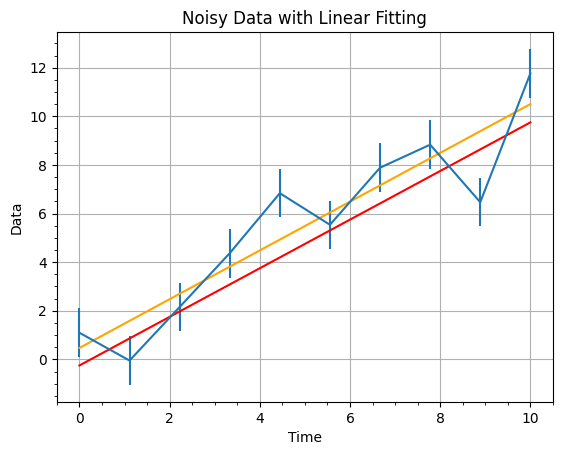

-----------------------------------------------------------------------------------------------------------------
Chi-square: 18.65657919085384
degrees of freedom: 8
reduced chi-square: 2.33207239885673
Probability of exceeding this chi-square by chance for correct model:  0.016808174606568582
With what confidence can we reject this model?  0.9831918253934314
-----------------------------------------------------------------------------------------------------------------


In [2]:
slope = 1
offset = 0.25
time = np.linspace(0, 10, 10)
data = np.random.normal(slope*time + offset,1) 
sigma = 1*np.random.normal(np.ones(len(data)),0.01)

plt.errorbar(time, data, sigma, label = 'Raw Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Noisy Data with Linear Fitting')
plt.grid(True)
plt.minorticks_on()

def Linear(x, *p):
    return p[0]*x + p[1]

a          = 1    #p[0]
b          = -0.25 #p[1]

gparams = np.array([a,b])

#my fitting function
xsmooth1 = np.linspace(np.min(time), np.max(time), 100) #creating a smooth array for many more data points
fsmooth1 = Linear(xsmooth1,*gparams)                               #the asterisk is important when calling my fitting function, this is my guess only
plt.plot(xsmooth1, fsmooth1, color = 'red', label = 'Guess Fit')    #labelled plot of my fitting

#optimized fitting function, it gives all the optimized parameters based on my guesses
popt, pcov = opt.curve_fit(Linear, time, data, sigma = sigma, p0=gparams, absolute_sigma=1)
for i in range(0,len(popt)):
    print('param ',i,' = ',popt[i], '+/-', np.sqrt(pcov[i,i]))

#optimized scipy version of my guesstimated fit
fsmooth2 = Linear(xsmooth1,*popt) 
plt.plot(xsmooth1,fsmooth2,color ='orange', label = 'Fitting Function') #labelled plot
plt.show()

#Calculation of Chi-Sqr, Degrees of Freedom and Reduced Chi Sqr 
yfit= Linear(time,*popt)
chisq = sum((data-yfit)**2 / sigma**2)
dof = len(time) - len(popt)
chisq_reduced = chisq/float(dof)
print ('-----------------------------------------------------------------------------------------------------------------')
print(f'Chi-square: {chisq}')
print(f'degrees of freedom: {dof}')
print(f'reduced chi-square: {chisq_reduced}')
print('Probability of exceeding this chi-square by chance for correct model: ',1.-stats.chi2.cdf(chisq,dof))
print('With what confidence can we reject this model? ',stats.chi2.cdf(chisq, dof))
print ('-----------------------------------------------------------------------------------------------------------------')

### Testing with Quadratic Fitting Function

param  0  =  -0.010499508838212598 +/- 0.035191269694845276
param  1  =  0.8570101810223305 +/- 0.36628838913334216
param  2  =  1.3581711341212528 +/- 0.7890926158982594


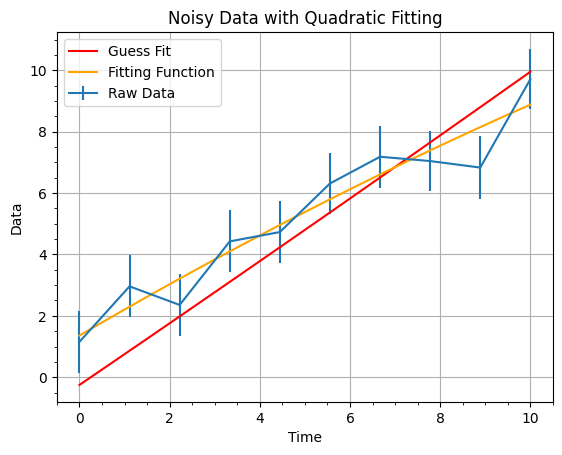

-----------------------------------------------------------------------------------------------------------------
Chi-square: 4.491914718344979
degrees of freedom: 7
reduced chi-square: 0.6417021026207113
Probability of exceeding this chi-square by chance for correct model:  0.7216906585473081
With what confidence can we reject this model?  0.2783093414526919
-----------------------------------------------------------------------------------------------------------------


In [3]:
slope = 1
offset = 0.25
time = np.linspace(0, 10, 10)
data = np.random.normal(slope*time + offset,1) 
sigma = 1*np.random.normal(np.ones(len(data)),0.01)

plt.errorbar(time, data, sigma, label = 'Raw Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Noisy Data with Quadratic Fitting')
plt.grid(True)
plt.minorticks_on()

def Quad(x, *p):
    return p[0]*x**2 + p[1]*x + p[2]

a          = 0.002    #p[0]
b          = 1     #p[1]
c          = -0.25  #p[2]

gparams = np.array([a,b,c])

#my fitting function
xsmooth1 = np.linspace(np.min(time), np.max(time), 100) #creating a smooth array for many more data points
fsmooth1 = Quad(xsmooth1,*gparams)                               #the asterisk is important when calling my fitting function, this is my guess only
plt.plot(xsmooth1, fsmooth1, color = 'red', label = 'Guess Fit')    #labelled plot of my fitting

#optimized fitting function, it gives all the optimized parameters based on my guesses
popt, pcov = opt.curve_fit(Quad, time, data, sigma = sigma, p0=gparams, absolute_sigma=1)
for i in range(0,len(popt)):
    print('param ',i,' = ',popt[i], '+/-', np.sqrt(pcov[i,i]))

#optimized scipy version of my guesstimated fit
fsmooth2 = Quad(xsmooth1,*popt) 
plt.plot(xsmooth1,fsmooth2,color ='orange', label = 'Fitting Function') #labelled plot
plt.legend()
plt.show()

#Calculation of Chi-Sqr, Degrees of Freedom and Reduced Chi Sqr 
yfit= Quad(time,*popt)
chisq = sum((data-yfit)**2 / sigma**2)
dof = len(time) - len(popt)
chisq_reduced = chisq/float(dof)
print ('-----------------------------------------------------------------------------------------------------------------')
print(f'Chi-square: {chisq}')
print(f'degrees of freedom: {dof}')
print(f'reduced chi-square: {chisq_reduced}')
print('Probability of exceeding this chi-square by chance for correct model: ',1.-stats.chi2.cdf(chisq,dof))
print('With what confidence can we reject this model? ',stats.chi2.cdf(chisq, dof))
print ('-----------------------------------------------------------------------------------------------------------------')

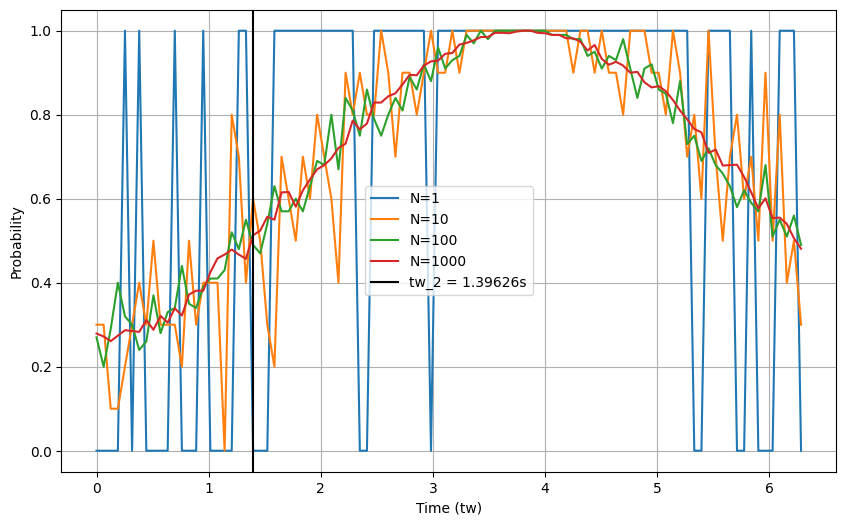

In [4]:
def ProbFunc(tp, tw, omega, delta, omegap):
    return (1 - omega**2/omegap**4 * (
        (omegap*np.cos(delta*tw/2))*np.sin(omegap*tp) - 
        2*delta*np.sin(delta*tw/2)*(np.sin(omegap*tp/2))**2)**2)

np.random.seed(123)

#Constants
tw = np.linspace(0, 2*np.pi, 100)
N = [1, 10, 100, 1000]
omega = 2*np.pi
delta = np.pi/4
tp = np.pi
omegap = np.sqrt(omega**2 + delta**2)

#For Different N?
data_1    = np.array([np.random.binomial(n=1, p=ProbFunc(tp, i, omega, delta, omegap))/1 for i in tw])
data_10   = np.array([np.random.binomial(n=10, p=ProbFunc(tp, i, omega, delta, omegap))/10 for i in tw])
data_100  = np.array([np.random.binomial(n=100, p=ProbFunc(tp, i, omega, delta, omegap))/100 for i in tw])
data_1000 = np.array([np.random.binomial(n=1000, p=ProbFunc(tp, i, omega, delta, omegap))/1000 for i in tw])

#Expected Signal
P1 = [ProbFunc(tp, x, omega, delta, omegap) for x in tw]

#Half point
tw_2 = tw[(data_1000 >= 0.49) & (data_1000 <= 0.52)][0]

#plt.plot(tw, P1)
plt.figure(figsize=(10, 6))
plt.plot(tw, data_1, label = 'N=1')
plt.plot(tw, data_10, label = 'N=10')
plt.plot(tw, data_100, label = 'N=100')
plt.plot(tw, data_1000, label = 'N=1000')
plt.axvline(x = tw_2, color = 'black', label = f'tw_2 = {tw_2:2g}s')
plt.xlabel('Time (tw)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

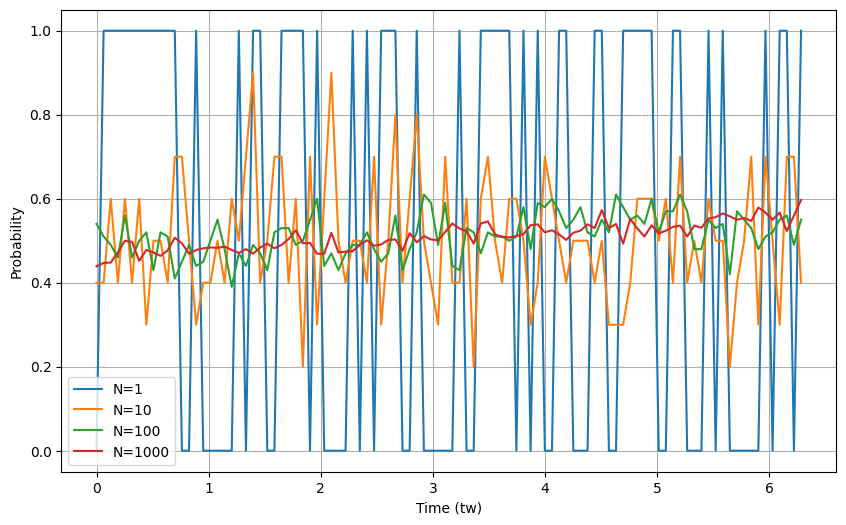

In [5]:
phi_t = np.linspace(-1, 1, 100)

tw_phi = tw_2 + phi_t/omega
data_1    = [np.random.binomial(n=1, p=ProbFunc(tp, i, omega, delta, omegap))/1 for i in tw_phi]
data_10   = [np.random.binomial(n=10, p=ProbFunc(tp, i, omega, delta, omegap))/10 for i in tw_phi]
data_100  = [np.random.binomial(n=100, p=ProbFunc(tp, i, omega, delta, omegap))/100 for i in tw_phi]
data_1000 = [np.random.binomial(n=1000, p=ProbFunc(tp, i, omega, delta, omegap))/1000 for i in tw_phi]

plt.figure(figsize = (10, 6))
plt.plot(tw, np.array(data_1), label = 'N=1')
plt.plot(tw, np.array(data_10), label = 'N=10')
plt.plot(tw, np.array(data_100), label = 'N=100')
plt.plot(tw, np.array(data_1000), label = 'N=1000')
plt.xlabel('Time (tw)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

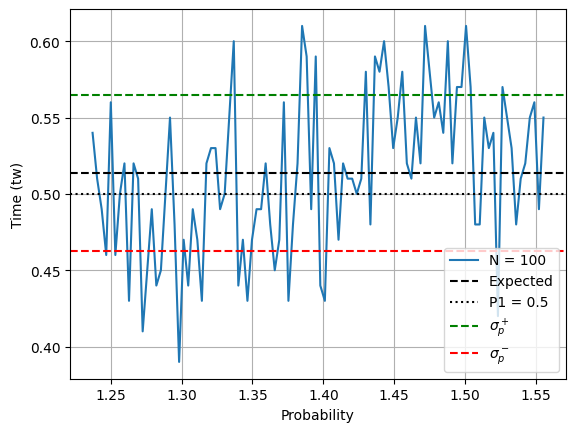

In [14]:
P1_phi = [ProbFunc(tp, i, omega, delta, omegap) for i in tw_phi]

plt.plot(tw_phi, data_100, label = 'N = 100')
plt.axhline(y = np.mean(data_100), label = 'Expected', color = 'black', linestyle = 'dashed')
plt.axhline(y = 0.5, label = 'P1 = 0.5', color = 'black', linestyle = 'dotted')
plt.axhline(y = np.mean(data_100) + abs(np.std(data_100)), label = '$\sigma_p^+$', color = 'green', linestyle = 'dashed')
plt.axhline(y = np.mean(data_100) - abs(np.std(data_100)), label = '$\sigma_p^-$', color = 'red', linestyle = 'dashed')
plt.xlabel('Probability')
plt.ylabel('Time (tw)')
plt.grid(True)
plt.legend()
plt.show()